In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

In [4]:
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
except ImportError:
    tf = None

In [5]:
data = pd.read_csv("C:/Users/HTC/OneDrive/Desktop/Emlpoyee/employee_data.csv")

In [6]:
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [8]:
data.drop_duplicates(inplace=True)
data.fillna(method='ffill', inplace=True)

C:\Users\HTC\AppData\Local\Temp\ipykernel_14212\3476946980.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [9]:
print(data.describe())

       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


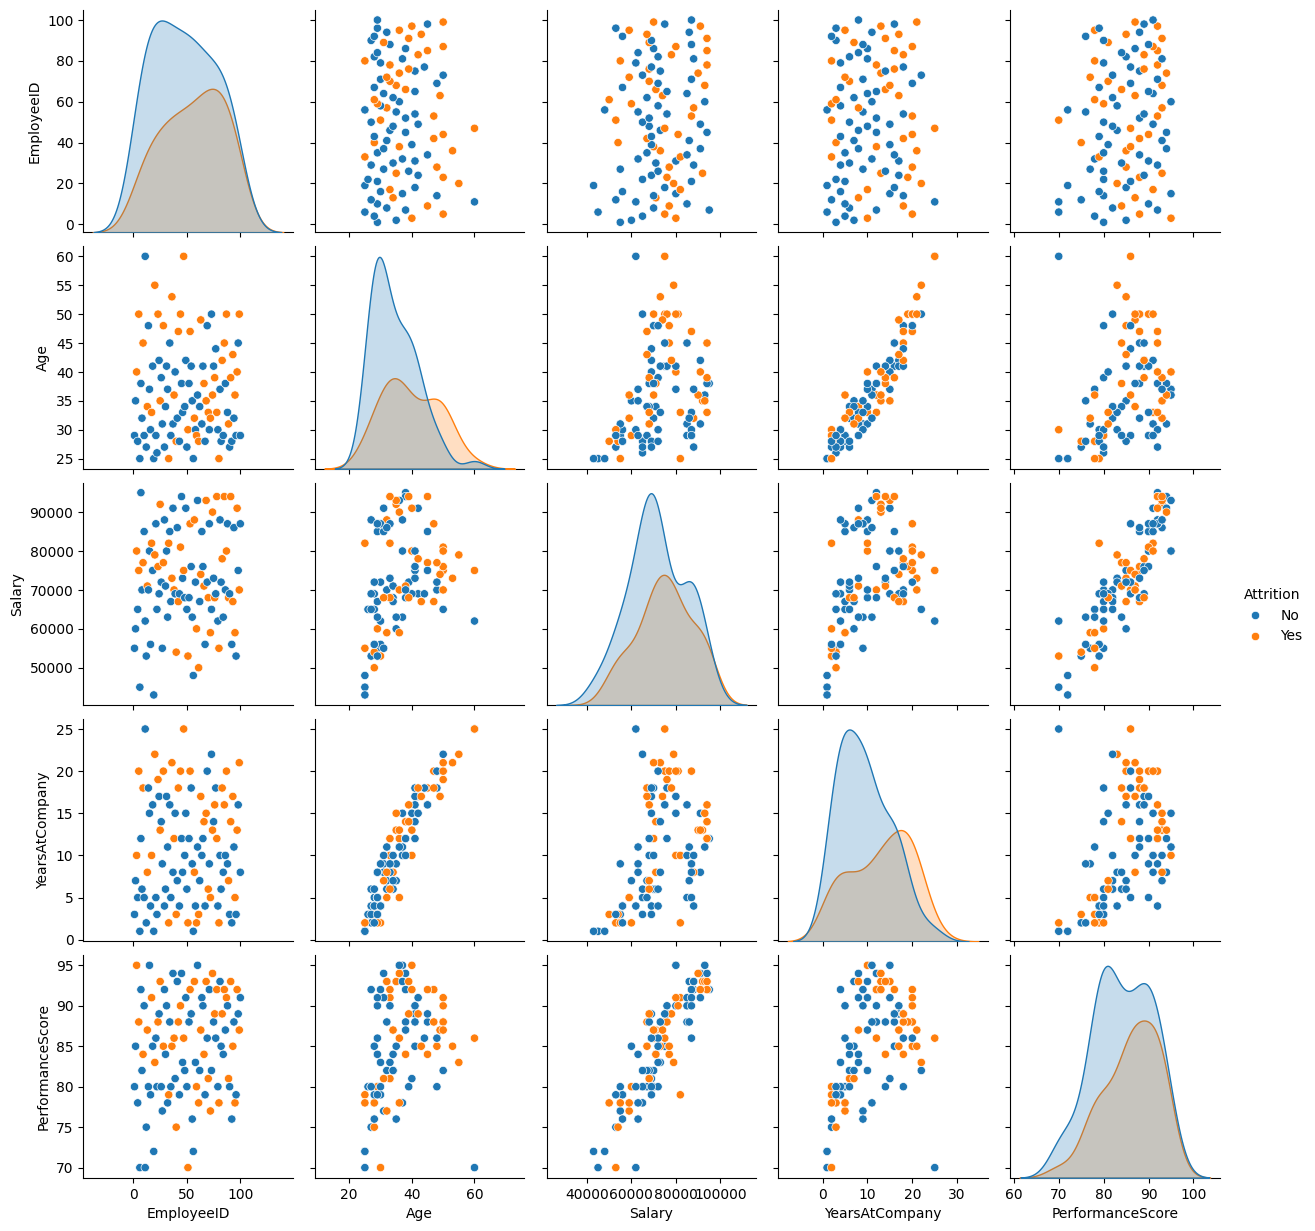

In [11]:
sns.pairplot(data, hue="Attrition")
plt.show()

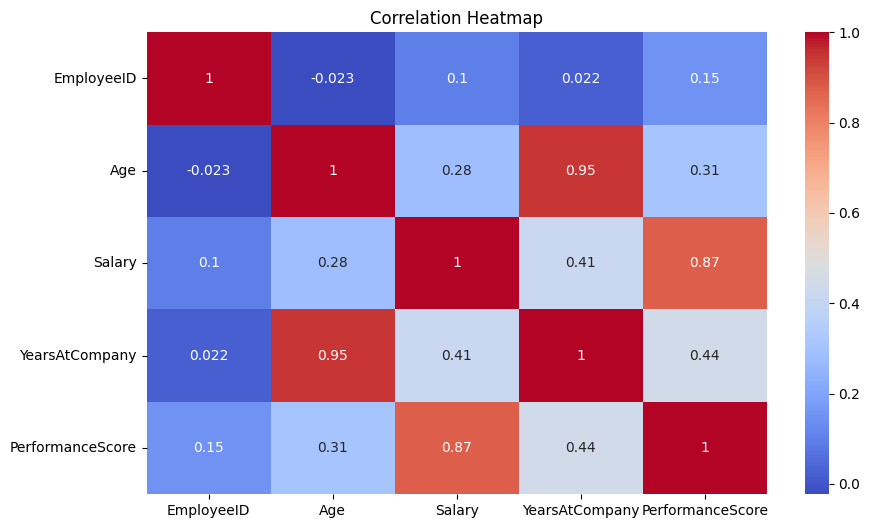

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

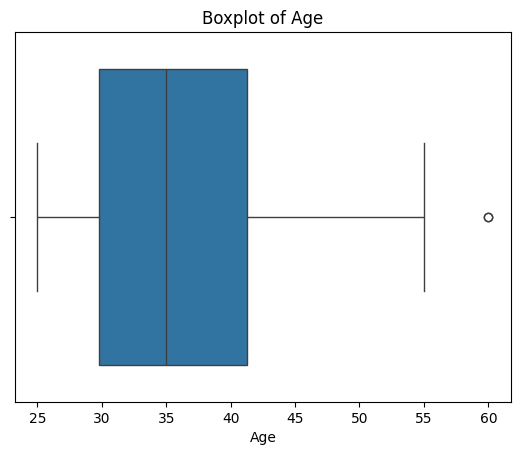

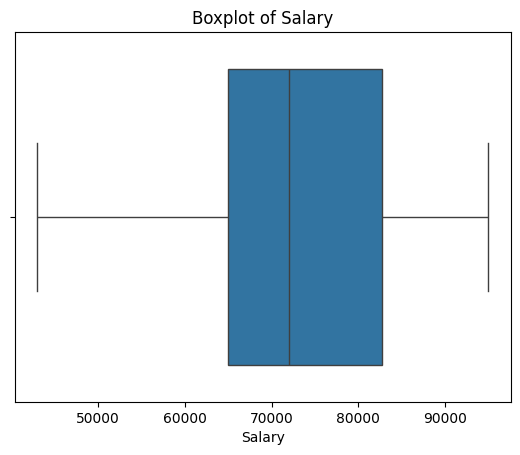

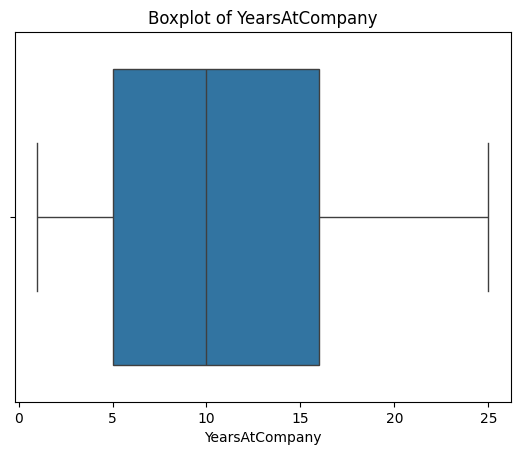

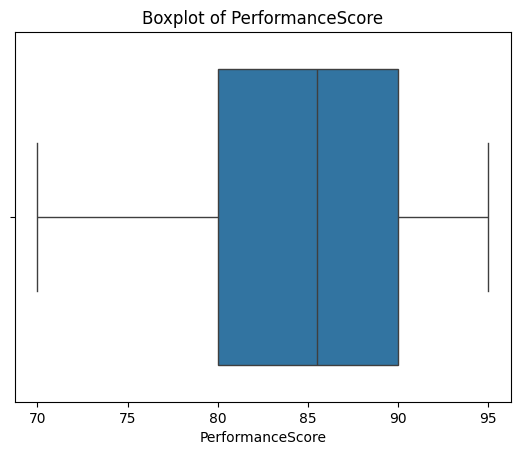

In [14]:
for col in ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']:
    sns.boxplot(data=data, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [15]:
P_attrition = len(data[data['Attrition'] == 'Yes']) / len(data)
P_perf = len(data[data['PerformanceScore'] < 3]) / len(data)
P_perf_given_attr = len(data[(data['Attrition'] == 'Yes') & (data['PerformanceScore'] < 3)]) / len(data[data['Attrition'] == 'Yes'])

In [17]:
if P_perf != 0:
    P_attr_given_perf = (P_perf_given_attr * P_attrition) / P_perf
    print(f"P(Attrition | Low Performance) = {P_attr_given_perf:.4f}")
else:
    print("No employees with low performance. Cannot compute conditional probability.")

No employees with low performance. Cannot compute conditional probability.


In [19]:
from scipy import stats
grouped = [group["PerformanceScore"].values for name, group in data.groupby("Department")]
f_stat, p_value = stats.f_oneway(*grouped)
print(f"F-Stat: {f_stat}, P-Value:){p_value}")

F-Stat: 25.781068086646336, P-Value:)2.5591493445552065e-12


In [20]:
le =LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])
data['Department'] = le.fit_transform(data['Department'])

In [21]:
scaler = StandardScaler()
data[['Salary', 'PerformanceScore']] = scaler.fit_transform(data[['Salary', 'PerformanceScore']])

In [22]:
X = data.drop(['Attrition', 'Name', 'EmployeeID'], axis=1)
y = data['Attrition']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.44      0.57      0.50         7

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.63      0.60      0.61        20



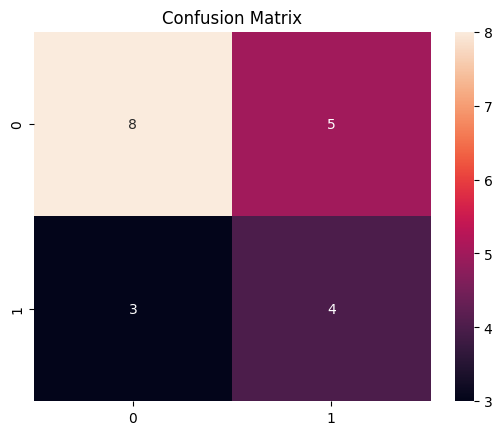

In [25]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [27]:
X = data.drop(['PerformanceScore', 'Name', 'EmployeeID'], axis=1)
y = data['PerformanceScore']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [30]:
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

R² Score: 0.7488
MSE: 0.3214


<function matplotlib.pyplot.show(close=None, block=None)>

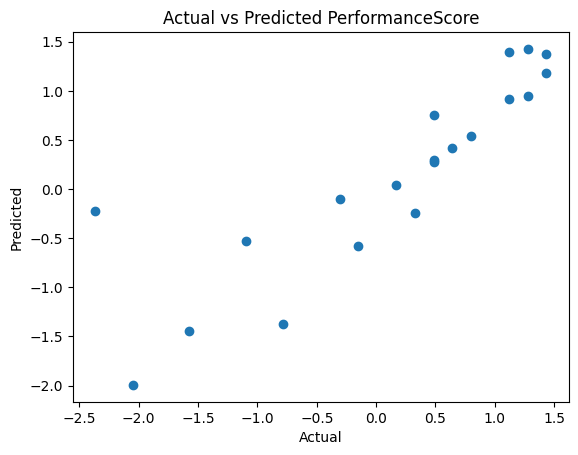

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted PerformanceScore")
plt.show

In [33]:
if tf:
    X = data.drop(['PerformanceScore', 'Name', 'EmployeeID'], axis=1)
    y = data['PerformanceScore']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

    mse = model.evaluate(X_test, y_test)
    print("NN MSE:", mse)

    X = data.drop(['Attrition', 'Name', 'EmployeeID'], axis=1)
    y = data['Attrition']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

    loss, acc = model.evaluate(X_test, y_test)
    print(f"NN Accuracy: {acc:.4f}")

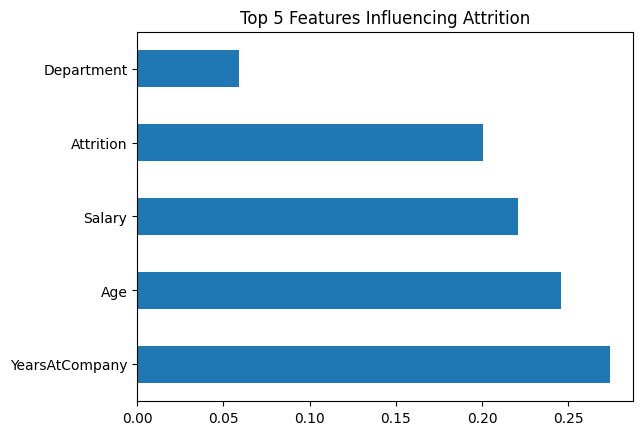

In [34]:
importance = pd.Series(clf.feature_importances_, index=X.columns)
importance.nlargest(5).plot(kind='barh')
plt.title("Top 5 Features Influencing Attrition")
plt.show()

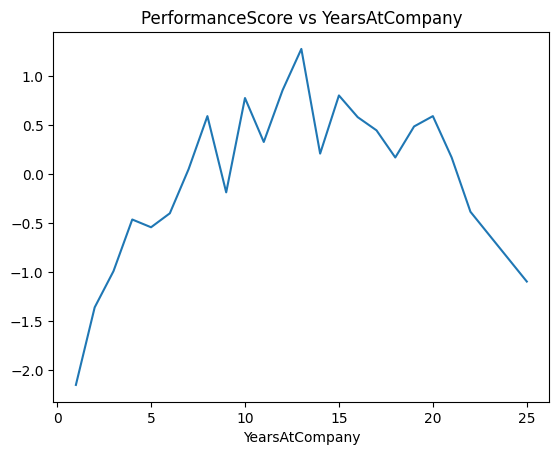

In [36]:
data.groupby('YearsAtCompany')['PerformanceScore'].mean().plot(kind='line')
plt.title('PerformanceScore vs YearsAtCompany')
plt.show()

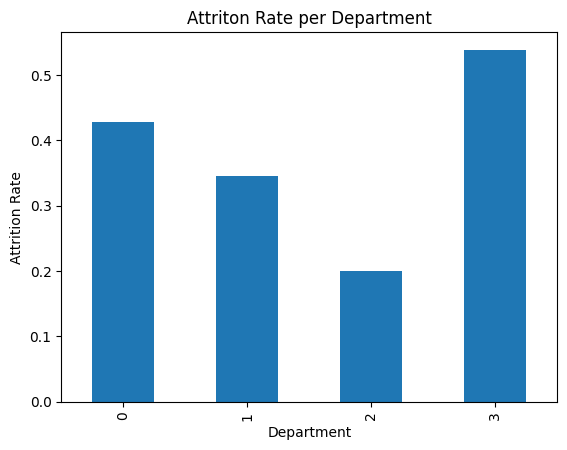

In [37]:
data.groupby('Department')['Attrition'].mean().plot(kind='bar')
plt.title('Attriton Rate per Department')
plt.ylabel('Attrition Rate')
plt.show()

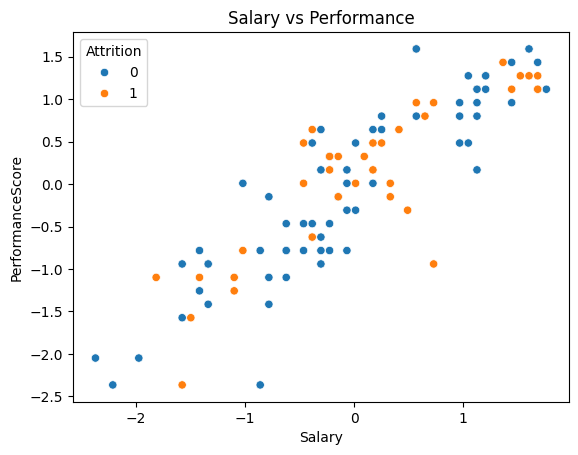

In [38]:
sns.scatterplot(data=data, x='Salary', y='PerformanceScore',hue='Attrition')
plt.title('Salary vs Performance')
plt.show()